In [1]:
# back to project root
%cd ~/research

import gc
import os
import sys
from glob import glob

import cv2
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import yaml
from scipy import signal

sys.path.append("src")
from utility.logger import logger
from utility.activity_loader import load_group
from utility.json_handler import load
from utility.video import Capture, Writer, concat_field_with_frame
from visualize.group import GroupVisualizer
from visualize.individual import write_field as ind_write_field
from visualize.keypoint import write_frame as kps_write_frame

/raid6/home/yokoyama/research


/home/yokoyama/research/.venv/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams["font.size"] = 24
plt.rcParams['xtick.direction'] = 'in'  # x axis in
plt.rcParams['ytick.direction'] = 'in'  # y axis in

In [3]:
room_num = "08"
surgery_num = "002"

In [4]:
cfg_path = "config/demo_config.yaml"
with open(cfg_path, "r") as f:
    cfg = yaml.safe_load(f)
with open(cfg["config_path"]["group"], "r") as f:
    grp_cfg = yaml.safe_load(f)

In [5]:
field = cv2.imread("image/field.png")
visualizer = GroupVisualizer(["attention"])

In [6]:
data_dir = os.path.join("data", room_num, surgery_num)
data_dirs = sorted(glob(os.path.join(data_dir, "*")))
for i in range(len(data_dirs)):
    if data_dirs[i].endswith("passing") or data_dirs[i].endswith("attention"):
        del data_dirs[i]
print(data_dirs)

['data/08/002/01', 'data/08/002/02', 'data/08/002/03', 'data/08/002/04', 'data/08/002/05', 'data/08/002/06', 'data/08/002/07', 'data/08/002/08', 'data/08/002/09', 'data/08/002/10', 'data/08/002/11', 'data/08/002/12', 'data/08/002/13', 'data/08/002/14', 'data/08/002/15', 'data/08/002/16', 'data/08/002/17', 'data/08/002/18', 'data/08/002/19', 'data/08/002/20']


In [7]:
heatmaps = []
for data_dir in data_dirs:
    print(data_dir)
    json_path = os.path.join(data_dir, ".json", "group.json")
    if os.path.exists(json_path):
        group = load_group(json_path, grp_cfg, field, logger, only_data_loading=True)
        attention_dict = group.attention
        heatmaps += list(attention_dict.values())

data/08/002/01


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6164231/6164231 [00:24<00:00, 251995.07it/s]


data/08/002/02


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8274497/8274497 [00:31<00:00, 261114.29it/s]


data/08/002/03


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8542310/8542310 [00:32<00:00, 258968.18it/s]


data/08/002/04


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8404632/8404632 [00:31<00:00, 266646.57it/s]


data/08/002/05


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8288511/8288511 [00:30<00:00, 268255.82it/s]


data/08/002/06


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7449254/7449254 [00:28<00:00, 265864.19it/s]


data/08/002/07


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7671376/7671376 [00:28<00:00, 267931.17it/s]


data/08/002/08


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6926758/6926758 [00:26<00:00, 265185.77it/s]


data/08/002/09


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8827369/8827369 [00:33<00:00, 266174.01it/s]


data/08/002/10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6346533/6346533 [00:24<00:00, 263948.05it/s]


data/08/002/11


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7895961/7895961 [00:29<00:00, 265727.23it/s]


data/08/002/12


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6987254/6987254 [00:26<00:00, 262031.90it/s]


data/08/002/13


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7255483/7255483 [00:27<00:00, 263009.58it/s]


data/08/002/14


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7403333/7403333 [00:28<00:00, 258344.34it/s]


data/08/002/15


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8445691/8445691 [00:32<00:00, 260065.29it/s]


data/08/002/16


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8295876/8295876 [00:31<00:00, 260713.66it/s]


data/08/002/17


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7059855/7059855 [00:27<00:00, 255827.48it/s]


data/08/002/18


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8681153/8681153 [00:33<00:00, 257316.31it/s]


data/08/002/19


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8586526/8586526 [00:34<00:00, 247523.78it/s]


data/08/002/20


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6366489/6366489 [00:25<00:00, 253505.49it/s]


2022-06-21 19:06:41,448 findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


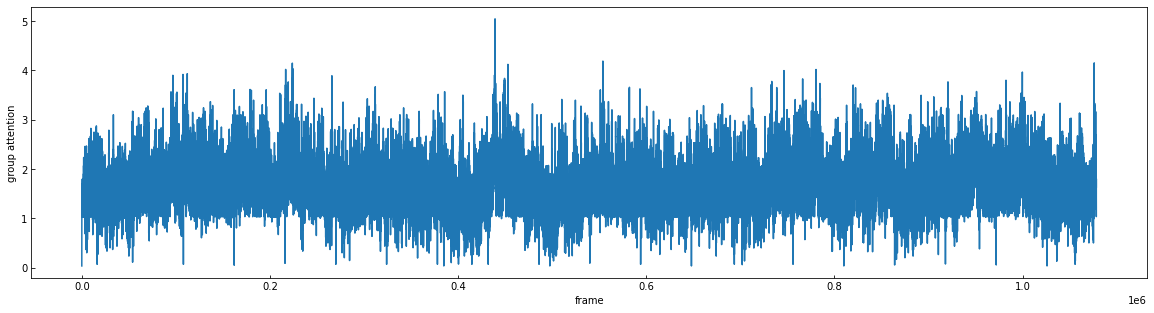

In [8]:
max_val = np.max(np.max(heatmaps, axis=1), axis=1)

plt.figure(figsize=(20, 5))
plt.plot(max_val, label="max")
plt.xlabel("frame")
plt.ylabel("group attention")
plt.show()

51


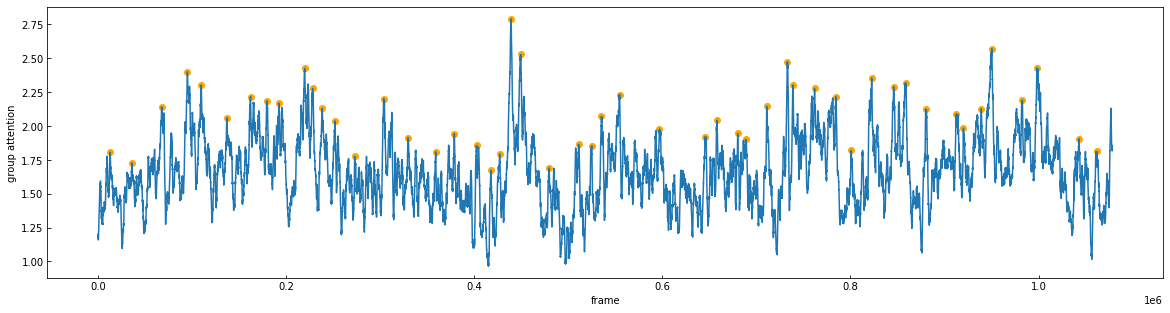

In [9]:
def moving_agerage(data, size):
    data_mean = np.convolve(data, np.ones(size) / size, mode="same")
    n_conv = size // 2
    
    # correction
    data_mean[0] *= size / n_conv
    for i in range(1, n_conv):
        data_mean[i] *= size / (i + n_conv)
        data_mean[-i] *= size / (i + n_conv - (size % 2)) 
        
    return data_mean

ma_size = 1800
max_val_ma = moving_agerage(max_val, size=ma_size)
peaks_ma = signal.find_peaks(max_val_ma, prominence=0.5)[0]
print(len(peaks_ma))

plt.figure(figsize=(20, 5))
plt.plot(max_val_ma, label="max")
plt.scatter(peaks_ma, max_val_ma[peaks_ma], color="orange")
plt.xlabel("frame")
plt.ylabel("group attention")
plt.savefig(os.path.join("data", "image", "attention", f"{room_num}_{surgery_num}_max.pdf"))
plt.show()

30


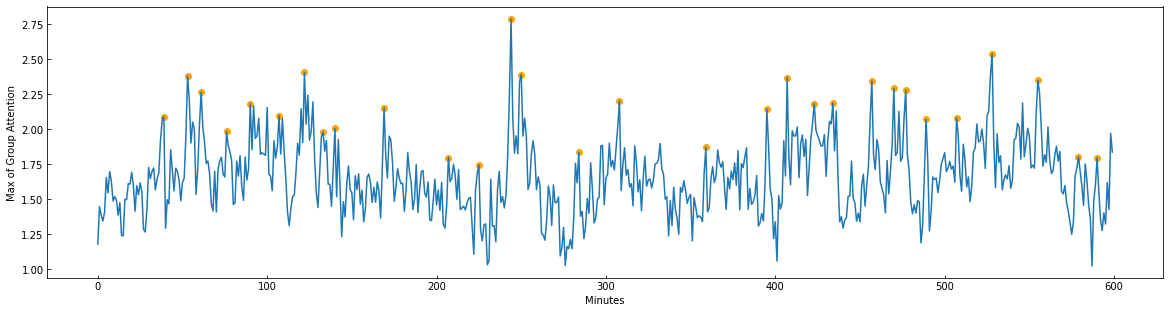

In [10]:
max_val_minutes = max_val_ma[::ma_size]
peaks_minutes = signal.find_peaks(max_val_minutes, prominence=0.5)[0]
print(len(peaks_minutes))

plt.figure(figsize=(20, 5))
plt.plot(max_val_minutes, label="max")
plt.scatter(peaks_minutes, max_val_minutes[peaks_minutes], color="orange")
plt.xlabel("Minutes")
plt.ylabel("Max of Group Attention")
plt.show()

In [14]:
def show_heatmaps(heatmap_lst, peaks, ma_size, division=20):
    indices = peaks
    selected_heatmap_lst = np.array(heatmap_lst[::ma_size])[indices]

    for frame_num, heatmap in zip(indices, selected_heatmap_lst):
        frame_num = (frame_num + 1) * ma_size
        file_num = frame_num // 54000 + 1
        frame_num = frame_num % 54000
        
        # create result for visualizing
        items = {"attention": []}
        for y in range(heatmap.shape[1]):
            for x in range(heatmap.shape[0]):
                item = {
                    "frame": frame_num,
                    "point": np.array([x, y]) * division,
                    "value": heatmap[x, y]
                }
                items["attention"].append(item)
        
        # video capture
        video_path = os.path.join("video", room_num, surgery_num, f"{file_num:02d}.mp4")
        cap = Capture(video_path)
        cap.set_pos_frame_count(frame_num)
        _, frame = cap.read()

        # visualize heatmap
        rslt_field = visualizer.write_field(
            key="attention",
            frame_num=frame_num,
            group_indicator_data=items,
            field=field.copy(),
        )
        frame = concat_field_with_frame(frame, rslt_field)
        
        print("file_num:", file_num, "minutes:", frame_num)
        plt.figure(figsize=(10, 5))
        plt.imshow(frame)
        plt.axis("off")
        plt.axis([0, frame.shape[1], frame.shape[0], 0])
        plt.show()
        
        del cap

file_num: 1 minutes: 16958


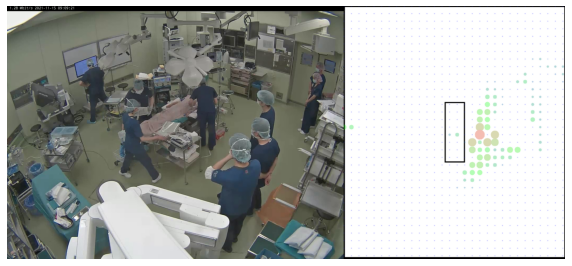

file_num: 2 minutes: 2683


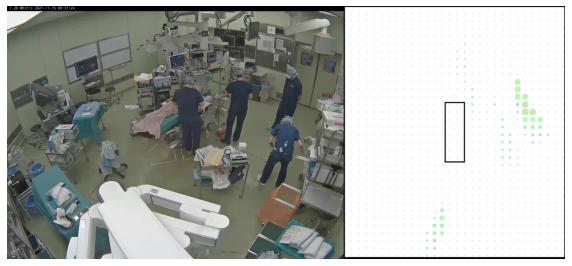

file_num: 2 minutes: 32644


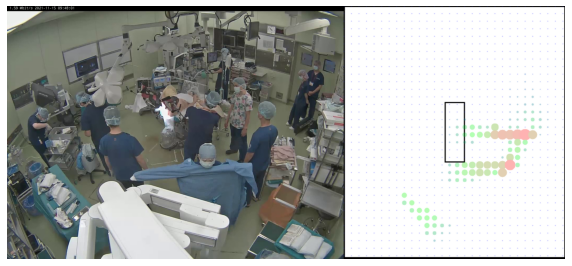

file_num: 3 minutes: 5301


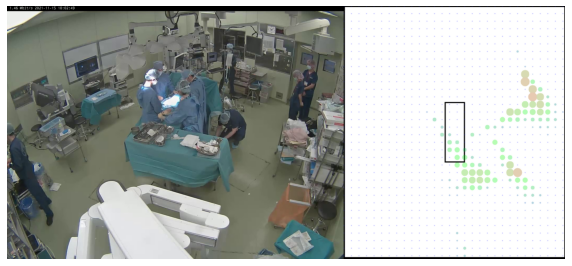

file_num: 3 minutes: 45893


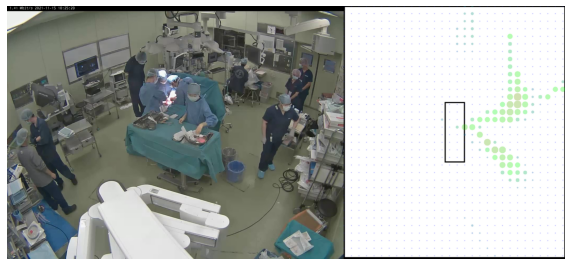

file_num: 4 minutes: 6768


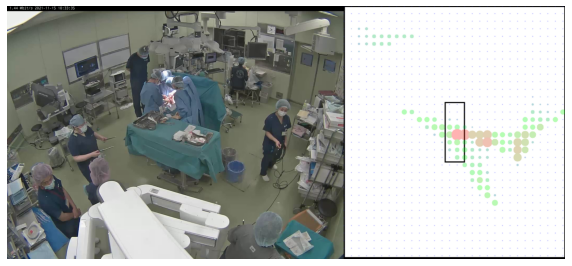

file_num: 4 minutes: 24178


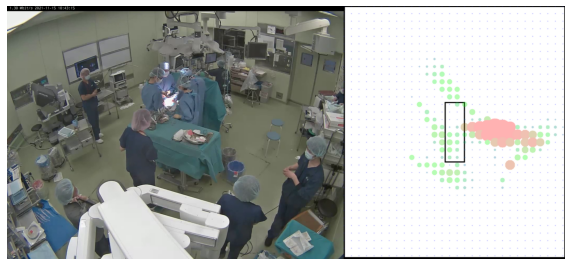

file_num: 4 minutes: 32408


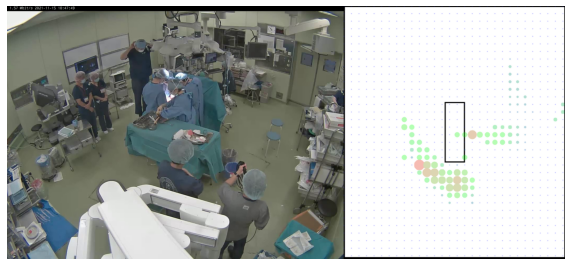

file_num: 5 minutes: 9300


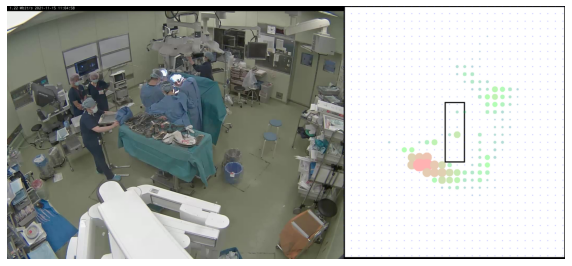

file_num: 5 minutes: 13717


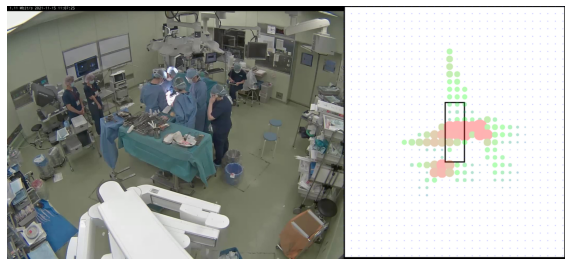

file_num: 5 minutes: 33722


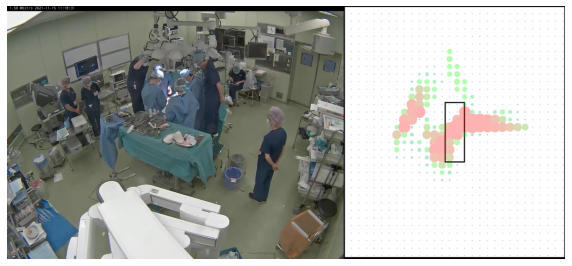

file_num: 6 minutes: 2469


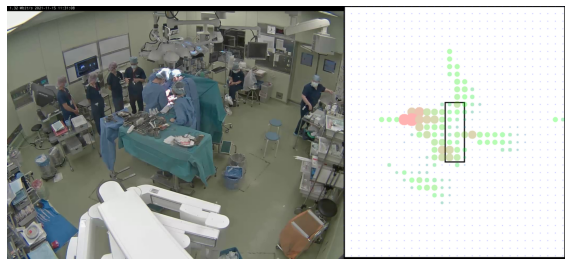

file_num: 6 minutes: 19539


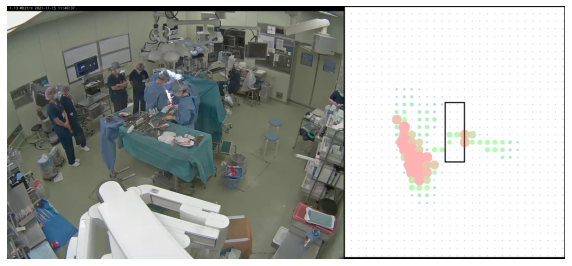

file_num: 6 minutes: 52712


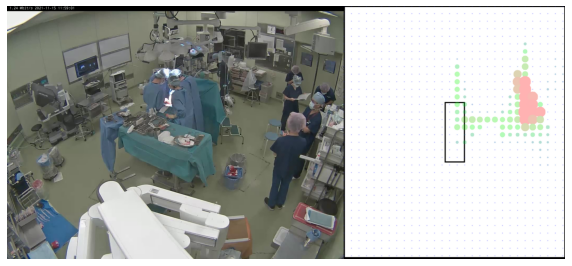

file_num: 7 minutes: 27387


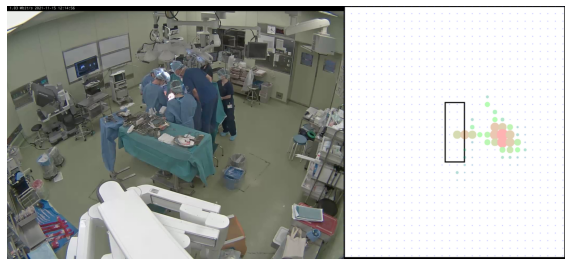

file_num: 7 minutes: 50480


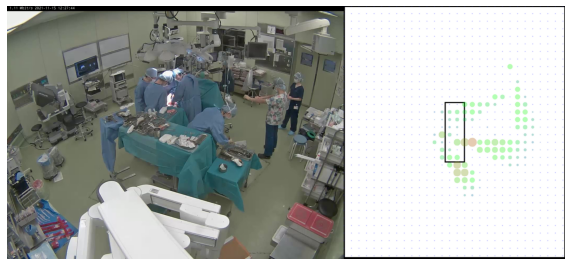

file_num: 8 minutes: 25884


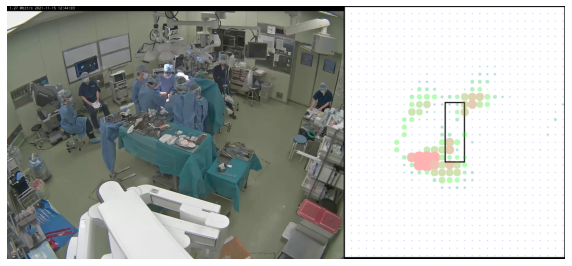

file_num: 8 minutes: 45198


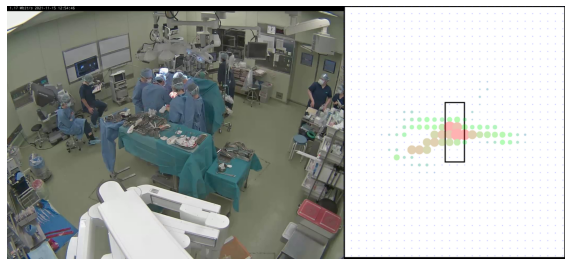

file_num: 9 minutes: 13293


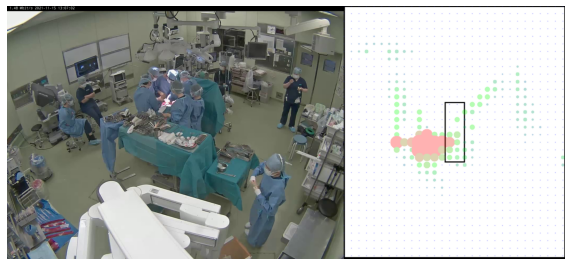

file_num: 9 minutes: 36389


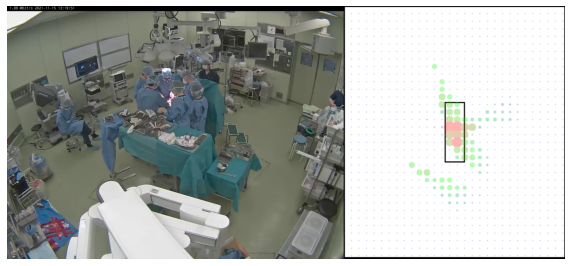

file_num: 10 minutes: 20400


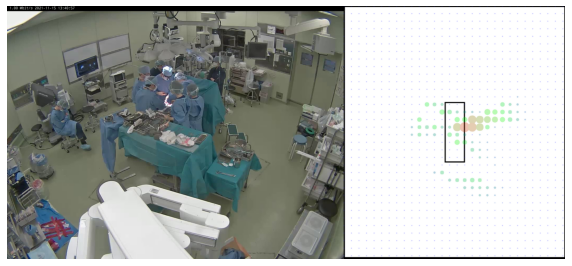

file_num: 10 minutes: 37375


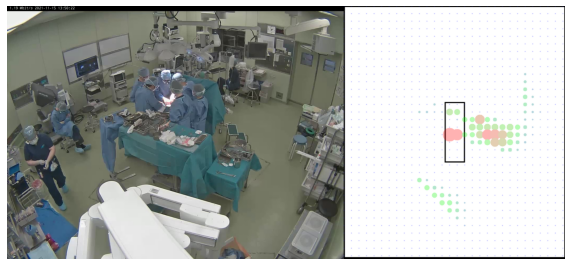

file_num: 10 minutes: 53376


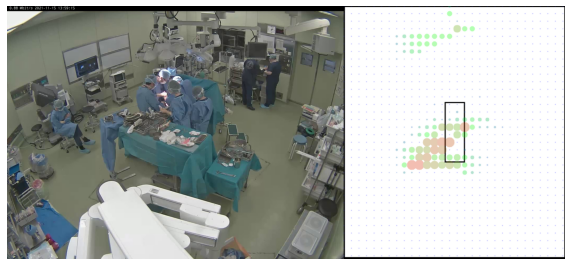

file_num: 11 minutes: 10707


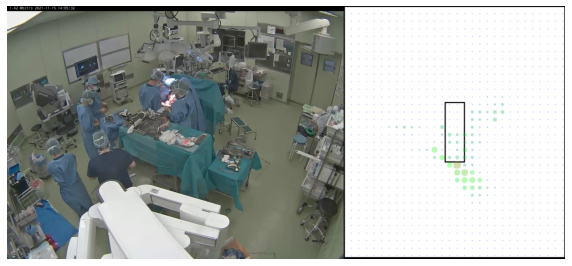

file_num: 11 minutes: 34149


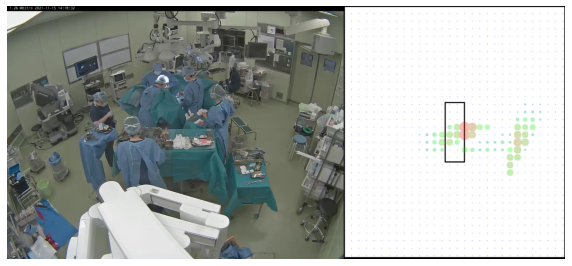

file_num: 12 minutes: 11734


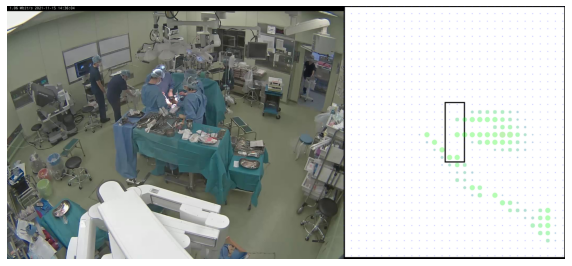

file_num: 12 minutes: 19925


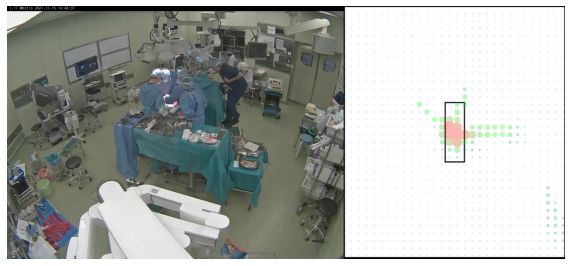

file_num: 12 minutes: 37137


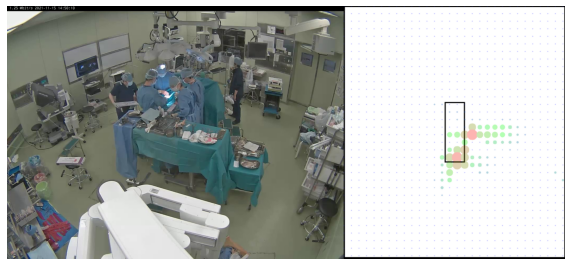

file_num: 12 minutes: 49230


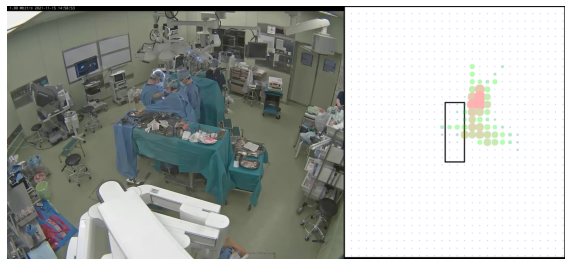

file_num: 13 minutes: 24519


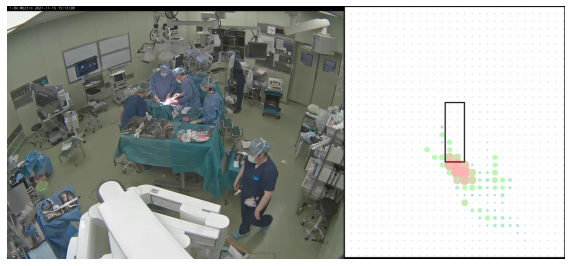

file_num: 13 minutes: 43411


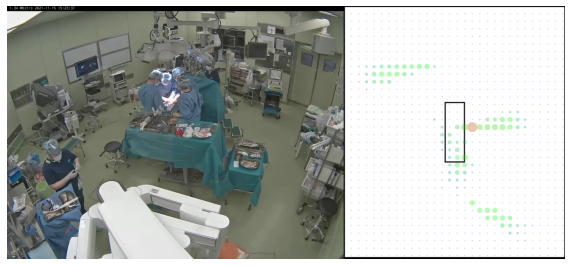

file_num: 14 minutes: 6156


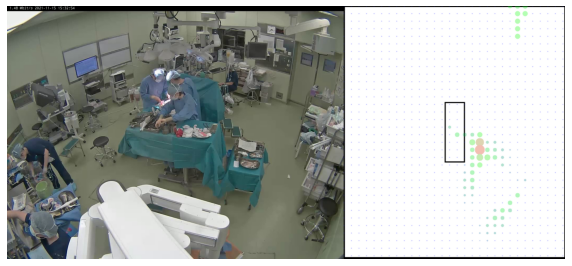

file_num: 14 minutes: 33113


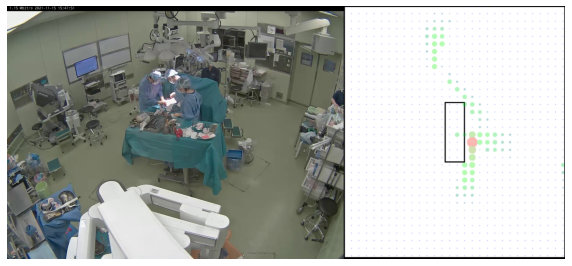

file_num: 15 minutes: 6947


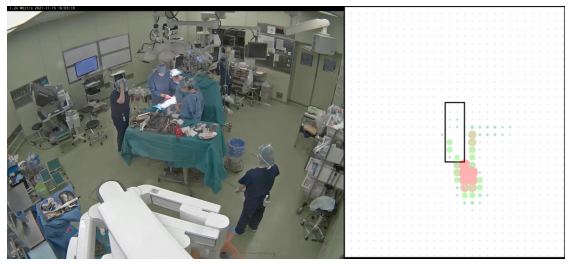

file_num: 15 minutes: 15036


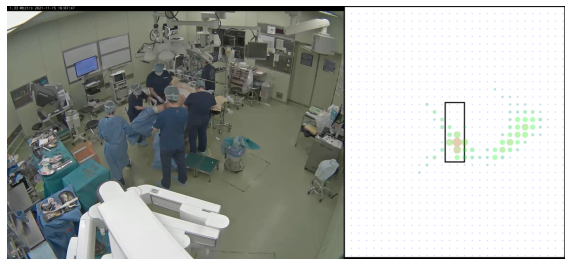

file_num: 15 minutes: 25259


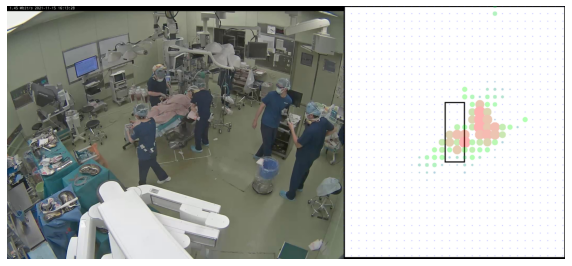

file_num: 15 minutes: 35214


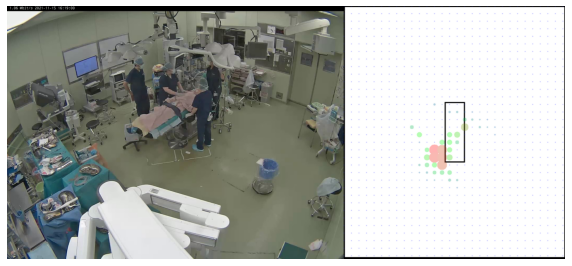

file_num: 15 minutes: 50343


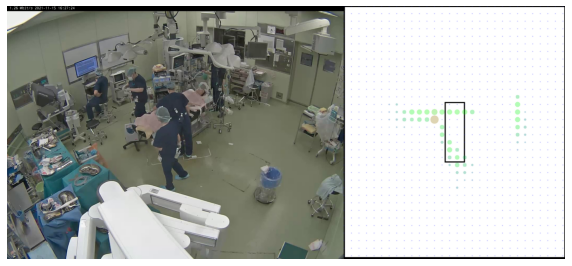

file_num: 16 minutes: 10197


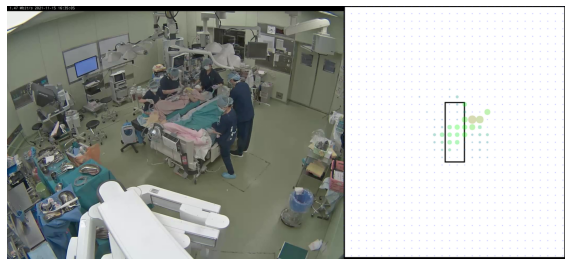

file_num: 16 minutes: 20441


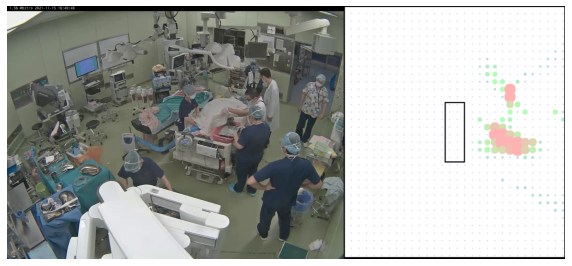

file_num: 17 minutes: 6782


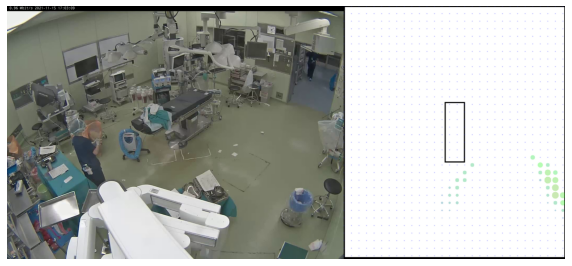

In [15]:
show_heatmaps(heatmaps, peaks_ma, 1)